# Coding task (50 points)

## Introduction
GPS is used to track the movement not only of your phones and vehicles, but also of tectonic plates. For this part of the exam, you will need to estimate the horizontal velocity/velocity vector (i.e., speed and direction) of the GPS station in Taguig City, which is part of an international network of GPS/GNSS stations.  This will give you an idea of the motion of southern Luzon island relative to the [international reference frame](https://spotlight.unavco.org/how-gps-works/gps-basics/gps-reference-frames.html).

The dataset includes the time (in Year-time ISO8601 format), the 2nd to 4th column the difference in position (in meters) in the north, east, and up position relative to the reference location at each time step, and 5th-6th columns are their respective standard deviations.  Note that speed is simply displacement over time (i.e., the slope of a distance over time graph)... and for simplicity's sake, we will assume constant velocity for the time coverage of the data (2015 to 2022) and ignore seasonal and anomalous signals.

You should accomplish this individually.  You can use any and all resources that is available to you, except that you must do this without consulting other humans, dead or alive, including your classmates.  But you can ask me (JD) questions.
## Scoring

The points system will be as follows:

1. Successfully importing of position data from the text file (5 points)
2. Displacement time-series plot of east position (10 points)
3. Displacement time-series plot of north position (10 points)
4. Estimation of eastward velocity *in cm/yr* from the data, supported by a plot (5 points)
5. Estimation of northward velociity *in cm/yr* from the data, supported by a plot (5 points)
6. Reasonable estimate of the velocity vector (speed in cm/yr and azimuth from north) (5 points)
7. Readability of the code; code has some useful comments (10 points)

In case you are not able to solve the whole task, partial points will be given for pseudocode.

## Expected output

Minimum is an Jupyter/Python notebook containing output.  You can also submit PDFs or PNGs of any output.  Submit in the UVLe module where you got this script.

This task should be doable in ~30 mins to 1 hour 20 minutes.  Maximum of 4 hours.

# Preparation
Run the cell below to download the data file `wPTGG.txt`.  This file will contain some metadata about the dataset, and the columns of data that you will need, particularly Year (decimals indicate a fraction of a year), DN (displacement in the north direction in meters), DE (displacement in the East direction in meters).

You do not need to account for DU (vertical displacement) and the standard deviations (SDN, SDE, and SDU).


In [ ]:
# Run this cell to download the data file. After doing so, the file 'wPTGG.txt'
# should appear in the file browser in the left panel (Folder icon). (It might)
# take a minute
!gdown 1RMjWUDbVX0SsNbApXsNqI1RSh9cHRhrx

Downloading...
From: https://drive.google.com/uc?id=1RMjWUDbVX0SsNbApXsNqI1RSh9cHRhrx
To: /content/wPTGG.txt
100% 15.4k/15.4k [00:00<00:00, 39.7MB/s]


# Solution

In [ ]:
#Importing required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Importing text file data

from google.colab import drive

#Mounting my google drive
#drive.mount('/content/drive')
#!ls '/content/drive/My Drive

#Loading data from text file
file_path = '/content/drive/My Drive/wPTGG.txt'

#Reading the text file
with open(file_path, 'r') as file:
  text = file.read()

#Printing the text
print(text)

# Site ID: PTGG						
# DOMES: 22006M006						
# File created: 2022-05-31T12:01:54						
# Analysis Centre: ULR Consortium						
# Solution code: ULR7						
# Datum: IGS14 (ellipsoid: GRS80)						
#						
# Reference epoch: 2010.9973						
# X :  -3184364.7266 +/- 0.0010 m      VX :   23.13 +/- 1.09 mm/yr						
# Y :   5291037.1020 +/- 0.0015 m      VY :   13.69 +/- 1.02 mm/yr						
# Z :   1590413.5441 +/- 0.0006 m      VZ :    6.03 +/- 0.45 mm/yr						
#						
# Latitude  :   14.53540204 degrees    VN :    5.88 +/- 0.39 mm/yr						
# Longitude :  121.04126673 degrees    VE :  -26.88 +/- 1.12 mm/yr						
# Height    :   84.8780 m              VU :    1.32 +/- 1.01 mm/yr						
#						
#						
# Note:	Following position offsets have been estimated (but not removed) in the time series:					
# offset 2016.57240        2.1        4.7        0.7    None						
# offset 2018.12190       -3.8        1.6       -1.0    None						
#						
Year	DN(m)	DE(m)	DU(m)	SDN	SDE	SDU
2015.2397	0.0571	-0.274

In [ ]:
#Loading and cleaning the data
fp = '/content/drive/My Drive/wPTGG.txt'
df = pd.read_csv(fp, sep='\t', comment='#', header=0)

#Extracting required columns
df.columns = ['Year', 'DN(m)', 'DE(m)', 'DU(m)','SDN','SDE','SDU']

df = df[pd.to_numeric(df['Year'], errors='coerce').notnull()] #Checking of 'Year' Column
df['Year'] = df['Year'].astype(float) #Making sure Year column is all float types

#Dropping NaN values in the columns
df['DN(m)'] = pd.to_numeric(df['DN(m)'], errors='coerce')
df['DE(m)'] = pd.to_numeric(df['DE(m)'], errors='coerce')
df['DU(m)'] = pd.to_numeric(df['DU(m)'], errors='coerce')

print(df.head())

        Year   DN(m)   DE(m)   DU(m)     SDN     SDE     SDU
0  2015.2397  0.0571 -0.2742  0.0113  0.0021  0.0026  0.0074
1  2015.2589  0.0589 -0.2755  0.0292  0.0027  0.0032  0.0106
2  2015.2781  0.0577 -0.2797  0.0219  0.0022  0.0025  0.0077
3  2015.2973  0.0581 -0.2744  0.0187  0.0022  0.0026  0.0078
4  2015.3164  0.0558 -0.2789  0.0194  0.0023  0.0030  0.0090


In [ ]:
#Converting date time to readable format

from datetime import datetime, timedelta

#Converting Fractional Year to datetime
def fractional_year_to_datetime(year):
  year_int = int(year)
  year_frac = year - year_int

  #Calculation of days in a year
  days_in_year = 366 if (year_int % 4 == 0 and (year_int % 100 !=0 or year_int % 400 == 0)) else 365
  days = year_frac * days_in_year

  return datetime(year_int,1,1) + timedelta(days=days)

df['Year'] = df['Year'].apply(fractional_year_to_datetime)
print(df.head())


                        Year   DN(m)   DE(m)   DU(m)     SDN     SDE     SDU
0 2015-03-29 11:46:19.200003  0.0571 -0.2742  0.0113  0.0021  0.0026  0.0074
1 2015-04-05 11:57:50.400001  0.0589 -0.2755  0.0292  0.0027  0.0032  0.0106
2 2015-04-12 12:09:21.600000  0.0577 -0.2797  0.0219  0.0022  0.0025  0.0077
3 2015-04-19 12:20:52.799998  0.0581 -0.2744  0.0187  0.0022  0.0026  0.0078
4 2015-04-26 11:39:50.399998  0.0558 -0.2789  0.0194  0.0023  0.0030  0.0090


Eastward velocity in cm/year: -5.88
Northward velocity in cm/year: 1.24


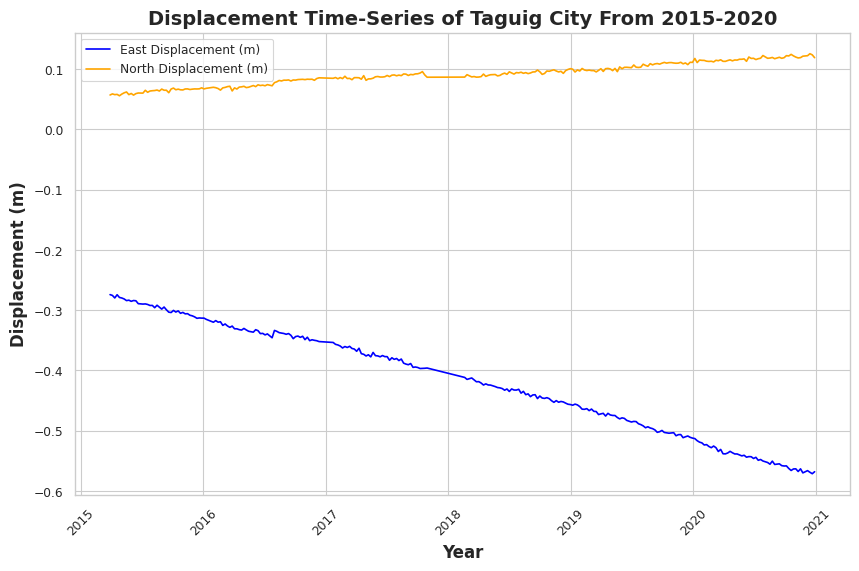

In [ ]:
#Computation of eastward and Northward velocity in cm/year
meters_to_cm = 100

#Eastward displacement
time_span_years = df['Year'].iloc[-1].year - df['Year'].iloc[0].year  # Total time span in years
total_east_displacement_m = df['DE(m)'].iloc[-1] - df['DE(m)'].iloc[0]  # Total east displacement in meters
velocity_east_cm_per_year = (total_east_displacement_m * meters_to_cm) / time_span_years

#Northward displacement
total_north_displacement_m = df['DN(m)'].iloc[-1] - df['DN(m)'].iloc[0]  # Total north displacement in meters
velocity_north_cm_per_year = (total_north_displacement_m * meters_to_cm) / time_span_years

print(f'Eastward velocity in cm/year: {velocity_east_cm_per_year:.2f}')
print(f'Northward velocity in cm/year: {velocity_north_cm_per_year:.2f}')

#Plotting the east displacement and north displacement time-series
import seaborn as sns
sns.set_theme()
sns.set_context('paper')
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['DE(m)'], label='East Displacement (m)', linestyle = '-', color='blue') #East Displacement
plt.plot(df['Year'], df['DN(m)'], label='North Displacement (m)', linestyle = '-', color='orange') #North Displacement

#Plot properties
plt.xlabel('Year', fontsize=12, fontweight = 'bold')
plt.ylabel('Displacement (m)', fontsize=12, fontweight = 'bold')
plt.title('Displacement Time-Series of Taguig City From 2015-2020', fontsize=14, fontweight='bold')
plt.grid(True)
[plt.xticks(rotation=45)]
plt.legend()
plt.savefig('/content/drive/MyDrive/displacement_time_series.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#Computation of Velocity vector and Azimuth from north
velocity_magnitude_cm_per_year = np.sqrt(velocity_east_cm_per_year**2 + velocity_north_cm_per_year**2)

azimuth_deg = np.arctan2(velocity_east_cm_per_year, velocity_north_cm_per_year) * 180 / np.pi
if azimuth_deg < 0:
  azimuth_deg += 360

print(f'Velocity Magnitude (cm/year): {velocity_magnitude_cm_per_year:.2f}')
print(f'Azimuth from North (degrees): {azimuth_deg:.2f}')

Velocity Magnitude (cm/year): 6.01
Azimuth from North (degrees): 281.89
